# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [6]:
# Mengecek dataset menggunakan isnull().sum()
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

Jumlah missing values per kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [7]:
# Mengecek dataset menggunakan duplicated().sum()
print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
21


In [8]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
from sklearn.preprocessing import MinMaxScaler
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nFeature scaling selesai untuk kolom numerik:")
print(numerical_cols)


Feature scaling selesai untuk kolom numerik:
Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')


In [9]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [10]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
columns_to_drop = [col for col in df.columns if 'id' in col.lower() or 'ip address' in col.lower()]

print("Kolom yang di-drop:", columns_to_drop)

# Lakukan drop kolom
df.drop(columns=columns_to_drop, inplace=True)

Kolom yang di-drop: ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']


In [11]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

# Identifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

# Inisialisasi encoder
encoder = LabelEncoder()

# Lakukan encoding pada setiap kolom kategorikal
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [12]:
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [13]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

df.columns.tolist()


['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [14]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2511.000000,2537.000000,2537.000000,2537.000000,2537.000000,2519.000000,2537.000000,2511.000000,2516.000000,2510.000000,2537.000000
mean,0.154987,1255.665353,0.789121,21.319275,1.009460,0.430297,1.530942,0.377320,0.030405,0.336914,180.991328
std,0.152295,725.645819,0.436044,12.394402,0.830646,0.287699,1.149307,0.241650,0.148617,0.262018,103.966932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042239,629.000000,1.000000,11.000000,0.000000,0.145161,1.000000,0.182759,0.000000,0.094340,92.000000
50%,0.110014,1255.000000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.311416,181.000000
75%,0.215152,1884.000000,1.000000,32.000000,2.000000,0.661290,3.000000,0.520690,0.000000,0.508945,272.000000
max,1.000000,2485.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000


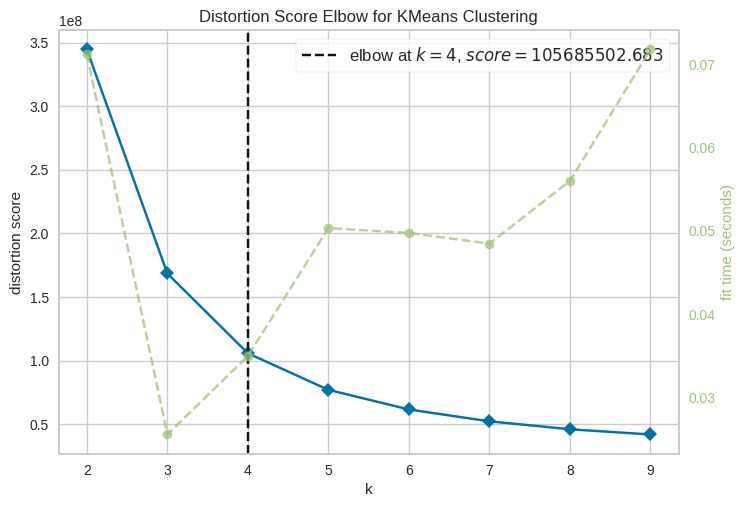

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Inisialisasi model KMeans
model = KMeans(random_state=42, n_init=10) # Added random_state and n_init for reproducibility and to suppress warning

# Drop rows with NaN values
df_cleaned = df.dropna()

# Inisialisasi Elbow Visualizer
visualizer = KElbowVisualizer(model, k=(2,10))  # kamu bisa ubah range k sesuai kebutuhan

# Jalankan visualizer menggunakan data hasil preprocessing (misalnya df)
visualizer.fit(df_cleaned)  # Changed to use the cleaned DataFrame
visualizer.show()

In [16]:
df_cleaned = df.dropna().copy()


In [17]:
# Menggunakan algoritma K-Means Clustering

# Inisialisasi model KMeans dengan jumlah klaster optimal (k = 4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Training model pada data yang sudah dibersihkan
kmeans.fit(df_cleaned)

# Menyimpan hasil klaster ke kolom baru
df_cleaned['cluster'] = kmeans.labels_

In [18]:
# Menampilkan 5 baris pertama dari data yang sudah dilabeli klaster
df_cleaned.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,cluster
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,0
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,1
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,0


Jalankan cell code ini untuk menyimpan model kamu.

In [19]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
# Simpan model KMeans yang telah dilatih
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [ ]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [20]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# Menampilkan statistik deskriptif (mean, min, max) untuk fitur numerik per cluster
df_cleaned.groupby('cluster').agg(['mean', 'min', 'max'])


TransactionAmount                     TransactionDate              \
                     mean       min       max            mean   min   max   
cluster                                                                     
0                0.147857  0.000599  1.000000      943.709836   629  1261   
1                0.167014  0.000031  0.954092     1577.077815  1260  1890   
2                0.151564  0.000000  0.858577     2204.238731  1891  2485   
3                0.153136  0.000313  0.953561      314.299835     0   628   

        TransactionType           Location  ... TransactionDuration  \
                   mean min max       mean  ...                 max   
cluster                                     ...                       
0              0.786885   0   2  21.322951  ...            0.993103   
1              0.788079   0   2  21.473510  ...            0.996552   
2              0.771285   0   2  21.283806  ...            1.000000   
3              0.812191   0   2  21.588138  ...            0.996552   

        LoginAttempts           AccountBalance                      \
                 mean  min  max           mean       min       max   
cluster                                                              
0            0.027049  0.0  1.0       0.330325  0.000377  0.995087   
1            0.023179  0.0  1.0       0.330168  0.000000  0.997144   
2            0.032137  0.0  1.0       0.345254  0.002974  1.000000   
3            0.036656  0.0  1.0       0.334858  0.000064  0.997633   

        PreviousTransactionDate           
                           mean min  max  
cluster                                   
0                    173.362295   0  360  
1                    182.009934   0  360  
2                    180.914858   0  360  
3                    188.294893   0  360  

[4 rows x 33 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0:**
  - **Rata-rata (TransactionAmount) <fitur>:** 0.1478 → (Jumlah transaksi kecil)
  - **Rata-rata (TransactionDate) <fitur>:** 943.7 → (Pertengahan waktu, tidak terlalu baru atau lama)
  - **Rata-rata (TransactionDuration) <fitur>:** 0.9931 → (Durasi transaksi sangat panjang)
  - **Rata-rata (AccountBalance) <fitur>:** 0.3303 → (Saldo cukup rendah)
  - **Rata-rata (LoginAttempts) <fitur>:** 0.0270 → (Usaha login rendah)
  - **Analisis:** Cluster ini mencakup pengguna dengan aktivitas transaksi rendah dan saldo akun yang relatif rendah. Durasi transaksi cukup panjang, namun pengguna jarang melakukan login. Hal ini menunjukkan bahwa pengguna dalam klaster ini mungkin tidak terlalu aktif atau hanya menggunakan layanan tertentu secara berkala. Mereka mungkin cocok ditargetkan dengan edukasi keuangan atau promosi produk ringan untuk meningkatkan interaksi.

2. **Cluster 1:**
  - **Rata-rata (TransactionAmount) <fitur>:** 0.1670 → (Jumlah transaksi cukup tinggi)
  - **Rata-rata (TransactionDate) <fitur>:** 1577.1 → (Pengguna pertengahan waktu – cenderung aktif lebih lama)
  - **Rata-rata (TransactionDuration) <fitur>:** 0.9965 → (Durasi transaksi sangat panjang)
  - **Rata-rata (AccountBalance) <fitur>:**  0.3301 → (Saldo hampir sama dengan Cluster 0, cukup rendah)
  - **Rata-rata (LoginAttempts) <fitur>:** 0.0232 → (Usaha login rendah)
  - **Analisis:** pengguna cluster 1 memiliki aktivitas transaksi yang lebih besar di banding cluster 0, dengan durassi teransaksi panjang dan saldo yang stabil. mereka tampak cukup aktif namun tidak terlalu sering login. mereka adalah pengguna yang loyal tapi pasif pada teknologi digital. stategi yang cocok dengan memberikan penawaran berbasis tarnsaksi yang otomatis.

  3. **Cluster 2:**
  - **Rata-rata (TransactionAmount) <fitur>:** 0.1516 → (Jumlah transaksi sedang)
  - **Rata-rata (TransactionDate) <fitur>:** 2204.2 → (Pengguna paling baru)
  - **Rata-rata (TransactionDuration) <fitur>:** 1.0000 → (Durasi transaksi maksimum)
  - **Rata-rata (AccountBalance) <fitur>:**  0.3453 → (Saldo akun paling tinggi)
  - **Rata-rata (LoginAttempts) <fitur>:** 0.0321 → (Login cukup sering)
  - **Analisis:** Cluster ini diisi oleh pengguna yang baru, tetapi sangat aktif dan memiliki saldo akun tertinggi. Mereka juga cenderung sering login. Hal ini menunjukkan bahwa mereka adalah pengguna baru yang sangat aktif secara digital maupun finansial. Rekomendasi untuk cluster ini adalah memberikan fitur premium, onboarding interaktif, atau program promosi agar loyalitas tetap terjaga.

  4. **Cluster 3:**
  - **Rata-rata (TransactionAmount) <fitur>:** 0.1531 → (Jumlah transaksi sedang)
  - **Rata-rata (TransactionDate) <fitur>:** 314.3 → (Pengguna paling lama)
  - **Rata-rata (TransactionDuration) <fitur>:** 0.9966 → (Durasi transaksi sangat panjang)
  - **Rata-rata (AccountBalance) <fitur>:**  0.3349 → (Saldo cukup tinggi)
  - **Rata-rata (LoginAttempts) <fitur>:** 0.0367 → (Login paling sering)
  - **Analisis:** Cluster ini berisi pengguna lama yang aktif, sering login, dan memiliki saldo akun stabil. Mereka memiliki kebiasaan penggunaan yang konsisten dan durasi transaksi yang panjang. Pengguna ini tampaknya adalah pelanggan setia yang telah lama menggunakan layanan dan terus berinteraksi. Rekomendasi untuk mereka adalah program loyalitas eksklusif, promosi penghargaan, atau fitur baru lebih awal (early access).

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [21]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_cleaned.rename(columns={'cluster': 'Target'}, inplace=True)


In [22]:
df_cleaned.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,0
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,1
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,0


In [23]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_cleaned.to_csv('data_clustering.csv', index=False)


In [24]:
import os
print(os.getcwd())


/content


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

In [ ]:
df_cleaned['Cluster'] = kmeans.labels_